송파구 전체 상권을 분석해보았습니다.
그러나 송파구 상권 중 '상권 확장'으로 분류되는 상권이 적은 바,
성북구로 바꾸어서 시각화를 다시 진행할 예정입니다.

In [ ]:
  !sudo apt-get install -y fonts-nanum
  !sudo fc-cache -fv
  !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (9,799 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 129504 files and di

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns
from google.colab import drive
drive.mount("/gdrive")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
#송파구에 있는 행정동들의 상권 상태를 분석해봅니다.
songpa = pd.read_excel("송파구.xls")
songpa.drop([0,0],axis=0,inplace=True)
songpa

FileNotFoundError: ignored

<AxesSubplot:>

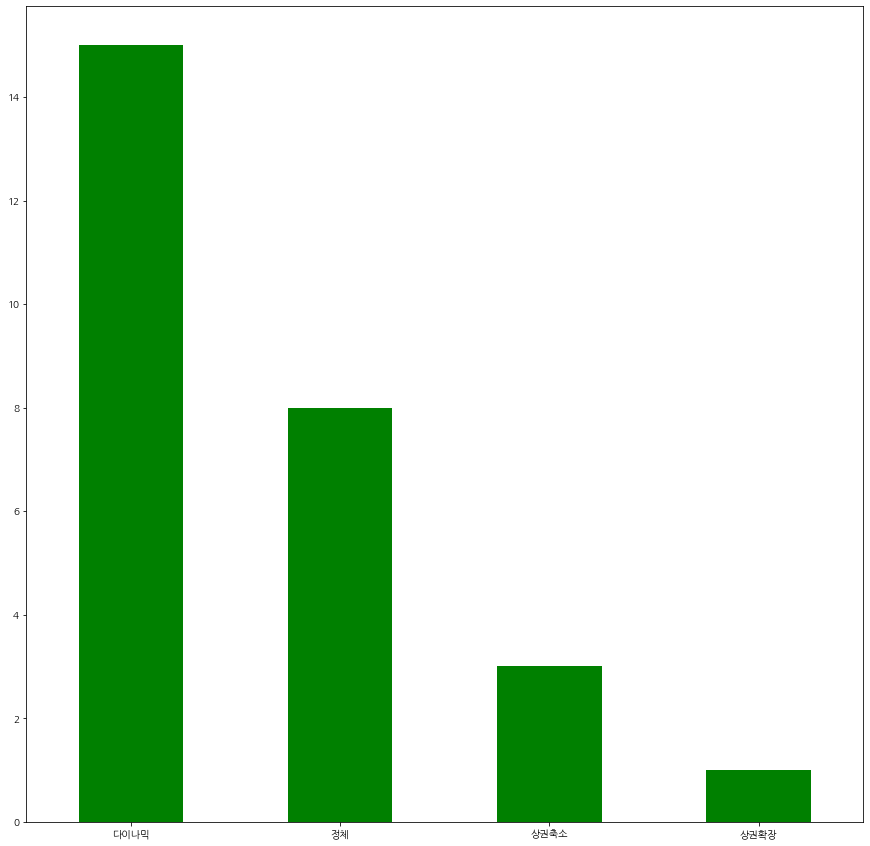

In [ ]:
songpa['상권변화지표'].value_counts().plot(kind="bar",rot=0,figsize=(15,15),color='green')

In [ ]:
#상권 영역 코드를 불러와서 분석해봅니다.
what_raw = pd.read_csv("/gdrive/My Drive/권수연/상권영역.csv",encoding='cp949')

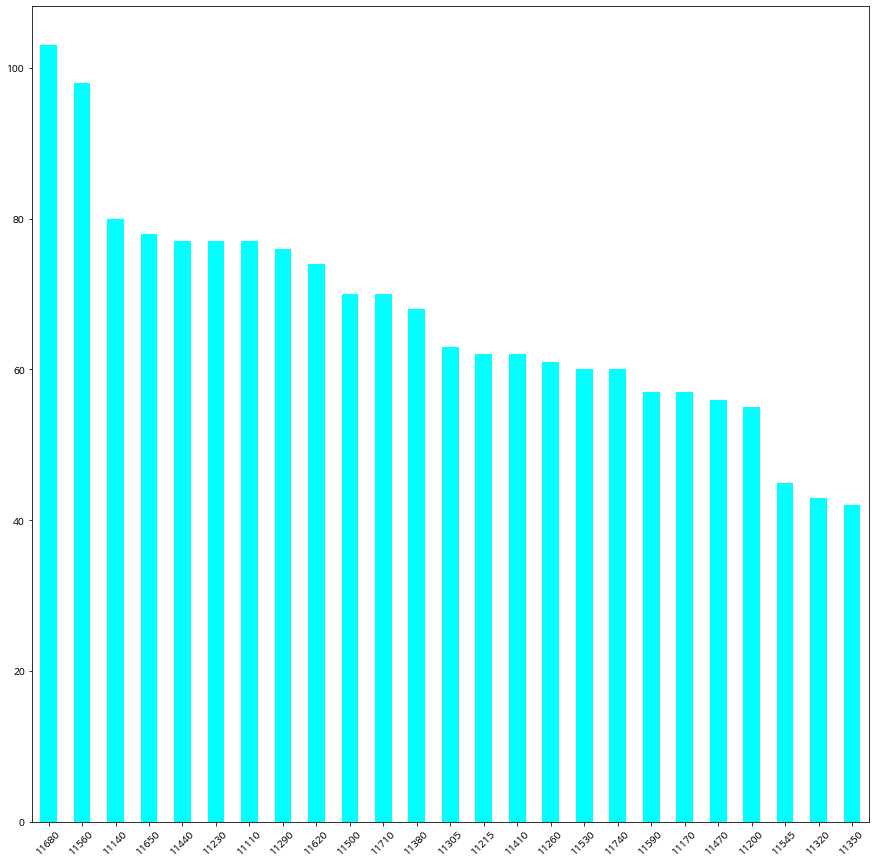

In [ ]:
what_raw['시군구_코드'].value_counts().plot(kind="bar",rot=45,figsize=(15,15),color='cyan')

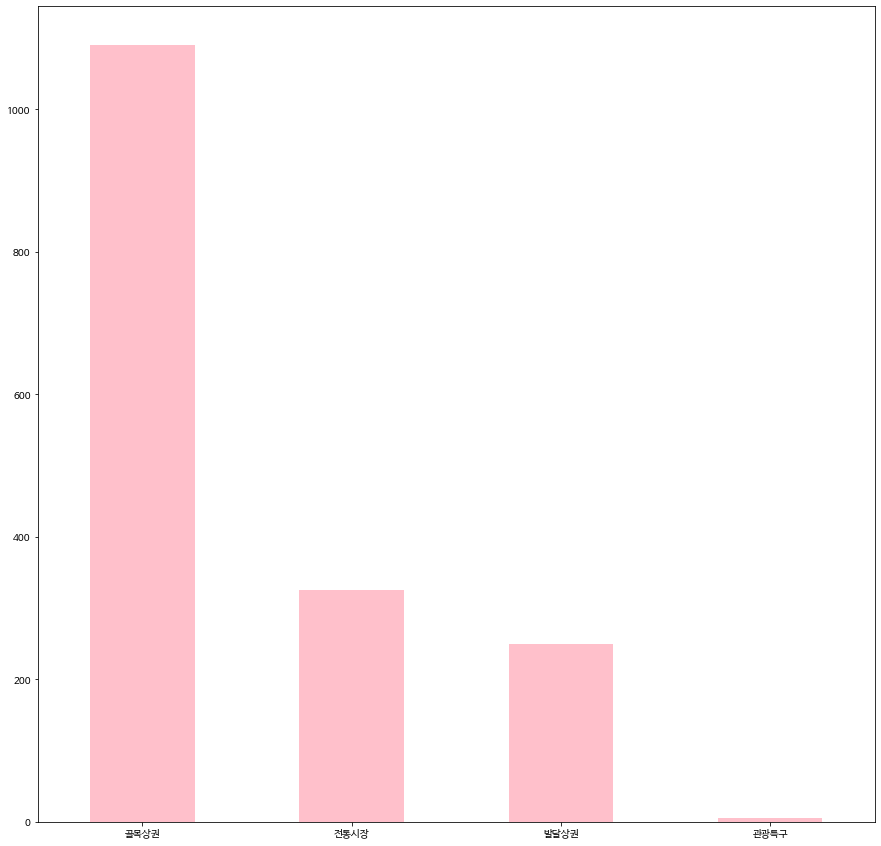

In [ ]:
what_raw['상권_구분_코드_명'].value_counts().plot(kind="bar",rot=0,figsize=(15,15),color='pink')

In [ ]:
#송파구 코드 11710을 불러온 뒤 송파구 매출에 영향을 주는 요인을 분석해봅니다.
what_df = what_raw[(what_raw['시군구_코드']==11710)]
code = what_df[['행정동_코드','상권_코드']]

In [ ]:
what_df.head()

,기준_년월_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드,형태정보
4,202112,A,골목상권,2111017,송파나루역 3번,210222,445516,11710,11710562,NaN
21,202112,A,골목상권,2111030,방이역 2번,211453,445218,11710,11710570,NaN
42,202112,A,골목상권,2111010,석촌역 7번,209002,445150,11710,11710600,NaN
49,202112,A,골목상권,2111003,삼전역 4번,207258,444942,11710,11710650,NaN
62,202112,A,골목상권,2111023,문정역 1번,210877,443156,11710,11710641,NaN


In [ ]:
what_df['행정동_코드'].value_counts().plot(kind="bar",rot=45,figsize=(15,15),color='yellow')

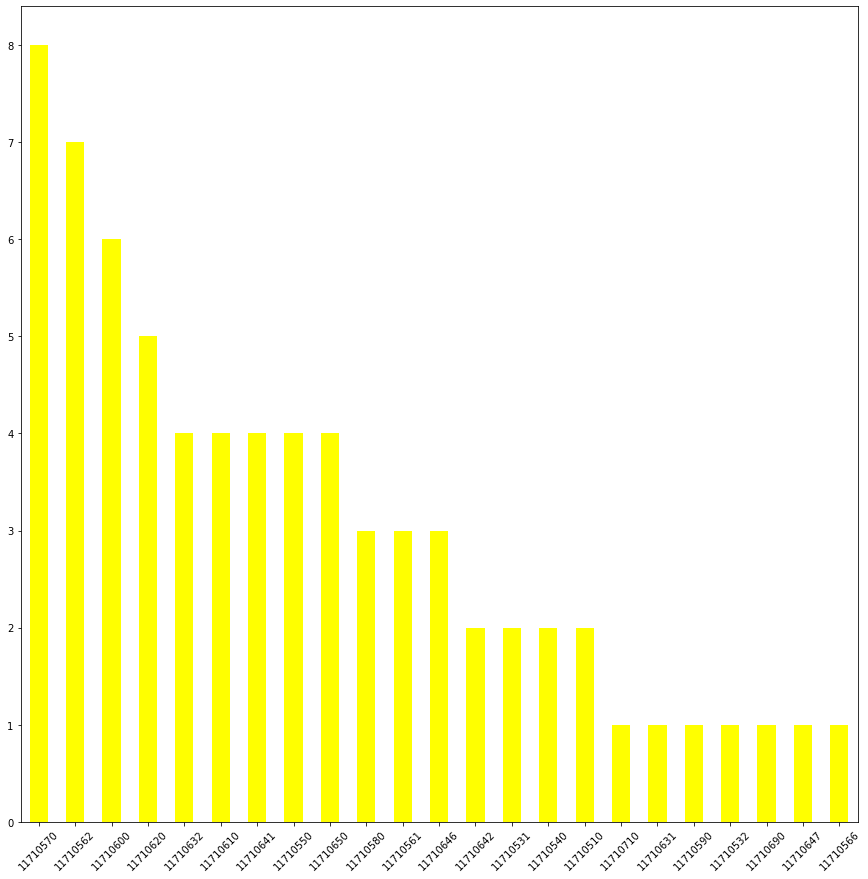

In [ ]:
what_df['행정동_코드'].value_counts().plot(kind="bar",rot=45,figsize=(15,15),color='yellow')

In [ ]:
code

,행정동_코드,상권_코드
4,11710562,2111017
21,11710570,2111030
42,11710600,2111010
49,11710650,2111003
62,11710641,2111023
...,...,...
1510,11710641,2130315
1533,11710550,2130317
1562,11710510,2130314
1563,11710600,2130312


In [ ]:
sale_raw = pd.read_csv("/gdrive/My Drive/권수연/상권-추정매출.csv",encoding='cp949')
sale_df = sale_raw[(sale_raw['기준_년_코드']==2022)&(sale_raw['기준_분기_코드']==3)]
drop = sale_df['서비스_업종_코드_명'].isin(['한의원','치과의원','일반의원','의약품'])
sale_df = sale_df[~drop]

In [ ]:
sale_total = pd.DataFrame(sale_df['분기당_매출_금액'].groupby(sale_df['상권_코드']).sum())
sale_total.head()

,분기당_매출_금액
상권_코드,
1001491,122030415815
1001492,365472241528
1001493,215720948384
1001494,235412350953
1001495,95202918514


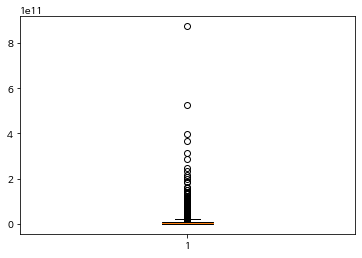

In [ ]:
plt.boxplot(sale_total['분기당_매출_금액'])
plt.show()

In [ ]:
peop_raw = pd.read_csv("/gdrive/My Drive/권수연/상권-생활인구.csv",encoding='cp949')
peop_df = peop_raw[(peop_raw['기준 년코드']==2022)&(peop_raw['기준_분기_코드']==3)]

In [ ]:
peop_total = peop_df[['상권_코드','총_생활인구_수']]

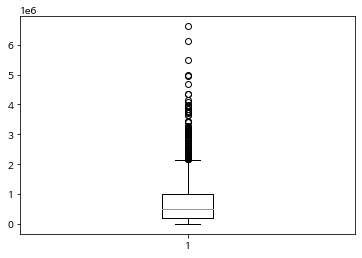

In [ ]:
plt.boxplot(peop_total['총_생활인구_수'])
plt.show()

In [ ]:
resi_raw = pd.read_csv("/gdrive/My Drive/권수연/상권-상주인구.csv",encoding='cp949')
resi_df = resi_raw[(resi_raw['기준_년_코드']==2022)&(resi_raw['기준_분기_코드']==3)]

In [ ]:
resi_total = resi_df[['상권_코드','총 상주인구 수']]

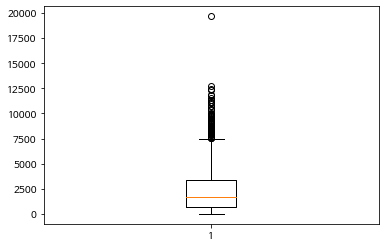

In [ ]:
plt.boxplot(resi_total['총 상주인구 수'])
plt.show()

In [ ]:
work_raw = pd.read_csv("/gdrive/My Drive/권수연/상권-직장인구.csv",encoding='cp949')
work_df = work_raw[(work_raw['기준_년월_코드']==2022)&(work_raw['기준_분기_코드']==3)]

In [ ]:
apar_raw = pd.read_csv("/gdrive/My Drive/권수연/상권-아파트.csv",encoding='cp949')
apar_df = apar_raw[(apar_raw['기준_년_코드']==2022)&(apar_raw['기준_분기_코드']==3)]

In [ ]:
inco_raw = pd.read_csv("/gdrive/My Drive/권수연/상권-소득소비.csv",encoding='cp949')
inco_df = inco_raw[(inco_raw['기준_년_코드']==2022)&(inco_raw['기준_분기_코드']==3)]

In [ ]:
cs = pd.merge(code,sale_total,how='left',on='상권_코드')
cs

,행정동_코드,상권_코드,분기당_매출_금액
0,11710562,2111017,843250088
1,11710570,2111030,2852759376
2,11710600,2111010,12860403657
3,11710650,2111003,15375125687
4,11710641,2111023,4126775558
...,...,...,...
65,11710641,2130315,19150325414
66,11710550,2130317,8732409913
67,11710510,2130314,6526113907
68,11710600,2130312,15898039765


In [ ]:
csp = pd.merge(cs,peop_df,how='left',on='상권_코드')
csp.head()

,행정동_코드,상권_코드,분기당_매출_금액,기준 년코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드_명,총_생활인구_수,남성_생활인구_수,...,여성연령대_60_이상_토요일시간대_3_생활인구_수,여성연령대_60_이상_토요일시간대_4_생활인구_수,여성연령대_60_이상_토요일시간대_5_생활인구_수,여성연령대_60_이상_토요일시간대_6_생활인구_수,여성연령대_60_이상_일요일시간대_1_생활인구_수,여성연령대_60_이상_일요일시간대_2_생활인구_수,여성연령대_60_이상_일요일시간대_3_생활인구_수,여성연령대_60_이상_일요일시간대_4_생활인구_수,여성연령대_60_이상_일요일시간대_5_생활인구_수,여성연령대_60_이상_일요일시간대_6_생활인구_수
0,11710562,2111017,843250088,2022,3,A,골목상권,송파나루역 3번,243232,113767,...,446,442,599,552,1098,868,489,419,616,559
1,11710570,2111030,2852759376,2022,3,A,골목상권,방이역 2번,1106032,513959,...,2649,2660,3809,2738,5944,5018,3160,2998,4147,2895
2,11710600,2111010,12860403657,2022,3,A,골목상권,석촌역 7번,1553759,711717,...,2921,2709,3750,3232,6913,5611,3360,2763,3910,3311
3,11710650,2111003,15375125687,2022,3,A,골목상권,삼전역 4번,1759989,812384,...,3265,3182,4713,4057,8654,6914,3636,3251,4923,4161
4,11710641,2111023,4126775558,2022,3,A,골목상권,문정역 1번,890195,450600,...,1524,1398,1755,1523,3378,2551,1381,1322,1788,1531


In [ ]:
csp_re = csp[['분기당_매출_금액','총_생활인구_수','남성_생활인구_수','여성_생활인구_수',
                  '연령대_10_생활인구_수','연령대_20_생활인구_수','연령대_30_생활인구_수','연령대_40_생활인구_수',
                  '연령대_50_생활인구_수','연령대_60_이상_생활인구_수','월요일_생활인구_수','화요일_생활인구_수',
                  '수요일_생활인구_수','목요일_생활인구_수','금요일_생활인구_수','토요일_생활인구_수','일요일_생활인구_수']]
csp_re.head()

,분기당_매출_금액,총_생활인구_수,남성_생활인구_수,여성_생활인구_수,연령대_10_생활인구_수,연령대_20_생활인구_수,연령대_30_생활인구_수,연령대_40_생활인구_수,연령대_50_생활인구_수,연령대_60_이상_생활인구_수,월요일_생활인구_수,화요일_생활인구_수,수요일_생활인구_수,목요일_생활인구_수,금요일_생활인구_수,토요일_생활인구_수,일요일_생활인구_수
0,843250088,243232,113767,129466,37209,34330,47952,39229,35688,48823,34858,35197,34933,35331,34662,33920,34332
1,2852759376,1106032,513959,592074,238499,110546,173839,161157,168120,253872,155666,155305,154960,155565,154056,161211,169270
2,12860403657,1553759,711717,842043,148116,260944,378311,267275,196453,302659,222229,221549,219699,219961,218706,223232,228384
3,15375125687,1759989,812384,947604,247359,257516,351708,293548,243434,366423,251377,248279,248710,245995,247740,252977,264911
4,4126775558,890195,450600,439593,99611,161300,190221,159042,124706,155313,132242,136963,137153,136112,131770,109070,106887


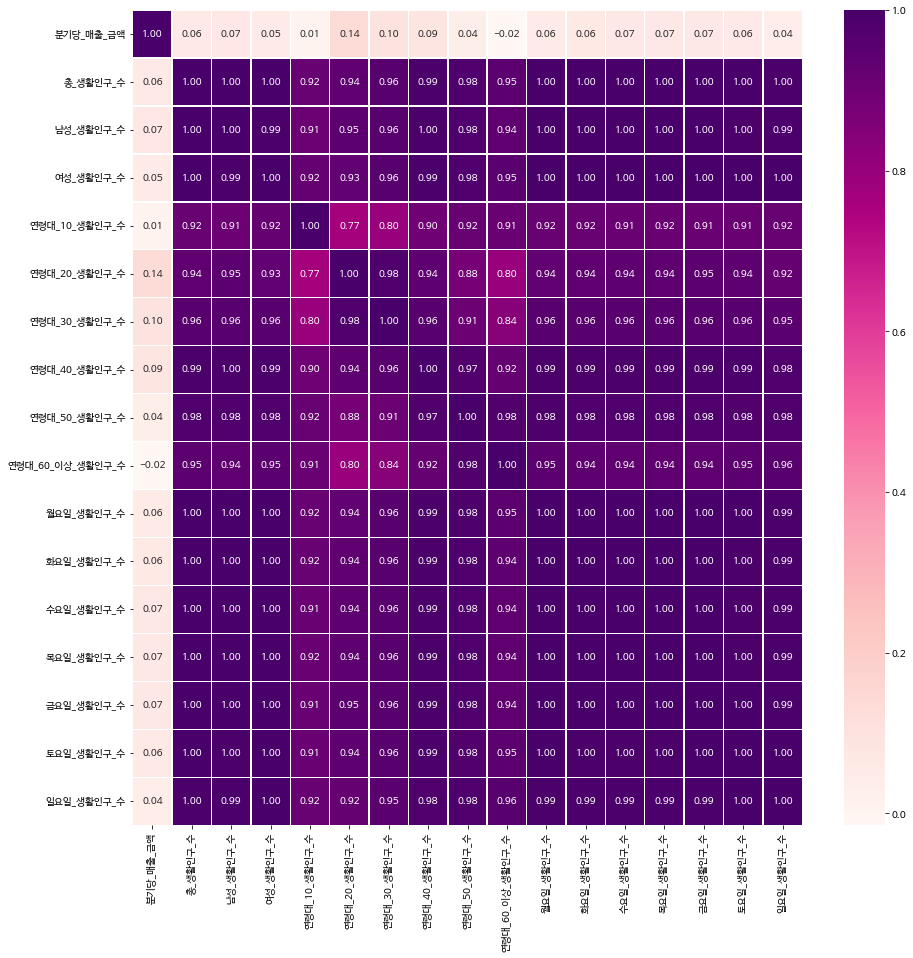

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data = csp_re.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='RdPu')

In [ ]:
csr = pd.merge(cs,resi_df,how='left',on='상권_코드')
csr.head()

,행정동_코드,상권_코드,분기당_매출_금액,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,총 상주인구 수,남성 상주인구 수,여성 상주인구 수,...,여성연령대 10 상주인구 수,여성연령대 20 상주인구 수,여성연령대 30 상주인구 수,여성연령대 40 상주인구 수,여성연령대 50 상주인구 수,여성연령대 60 이상 상주인구 수,총 가구 수,아파트 가구 수,비 아파트 가구 수,상권 코드 명
0,11710562,2111017,843250088,2022.0,3.0,A,골목상권,1266.0,587.0,679.0,...,61.0,122.0,140.0,101.0,98.0,157.0,624.0,0.0,624.0,송파나루역 3번
1,11710570,2111030,2852759376,2022.0,3.0,A,골목상권,1884.0,923.0,961.0,...,126.0,151.0,139.0,149.0,174.0,222.0,803.0,0.0,803.0,방이역 2번
2,11710600,2111010,12860403657,2022.0,3.0,A,골목상권,8776.0,4099.0,4677.0,...,455.0,939.0,1114.0,673.0,609.0,887.0,4784.0,0.0,4784.0,석촌역 7번
3,11710650,2111003,15375125687,2022.0,3.0,A,골목상권,10773.0,5077.0,5696.0,...,696.0,1032.0,1175.0,894.0,824.0,1075.0,5347.0,0.0,5347.0,삼전역 4번
4,11710641,2111023,4126775558,2022.0,3.0,A,골목상권,2005.0,997.0,1008.0,...,102.0,202.0,186.0,130.0,165.0,223.0,1026.0,0.0,1026.0,문정역 1번


In [ ]:
csr_re = csr[['분기당_매출_금액','총 상주인구 수', '남성 상주인구 수', '여성 상주인구 수', '연령대 10 상주인구 수',
       '연령대 20 상주인구 수', '연령대 30 상주인구 수', '연령대 40 상주인구 수', '연령대 50 상주인구 수',
       '연령대 60 이상 상주인구 수','총 가구 수', '아파트 가구 수', '비 아파트 가구 수']]
csr_re.head()

,분기당_매출_금액,총 상주인구 수,남성 상주인구 수,여성 상주인구 수,연령대 10 상주인구 수,연령대 20 상주인구 수,연령대 30 상주인구 수,연령대 40 상주인구 수,연령대 50 상주인구 수,연령대 60 이상 상주인구 수,총 가구 수,아파트 가구 수,비 아파트 가구 수
0,843250088,1266.0,587.0,679.0,137.0,208.0,281.0,183.0,180.0,277.0,624.0,0.0,624.0
1,2852759376,1884.0,923.0,961.0,275.0,303.0,265.0,281.0,348.0,412.0,803.0,0.0,803.0
2,12860403657,8776.0,4099.0,4677.0,879.0,1633.0,2181.0,1334.0,1141.0,1608.0,4784.0,0.0,4784.0
3,15375125687,10773.0,5077.0,5696.0,1369.0,1873.0,2332.0,1710.0,1535.0,1954.0,5347.0,0.0,5347.0
4,4126775558,2005.0,997.0,1008.0,189.0,412.0,414.0,271.0,306.0,413.0,1026.0,0.0,1026.0


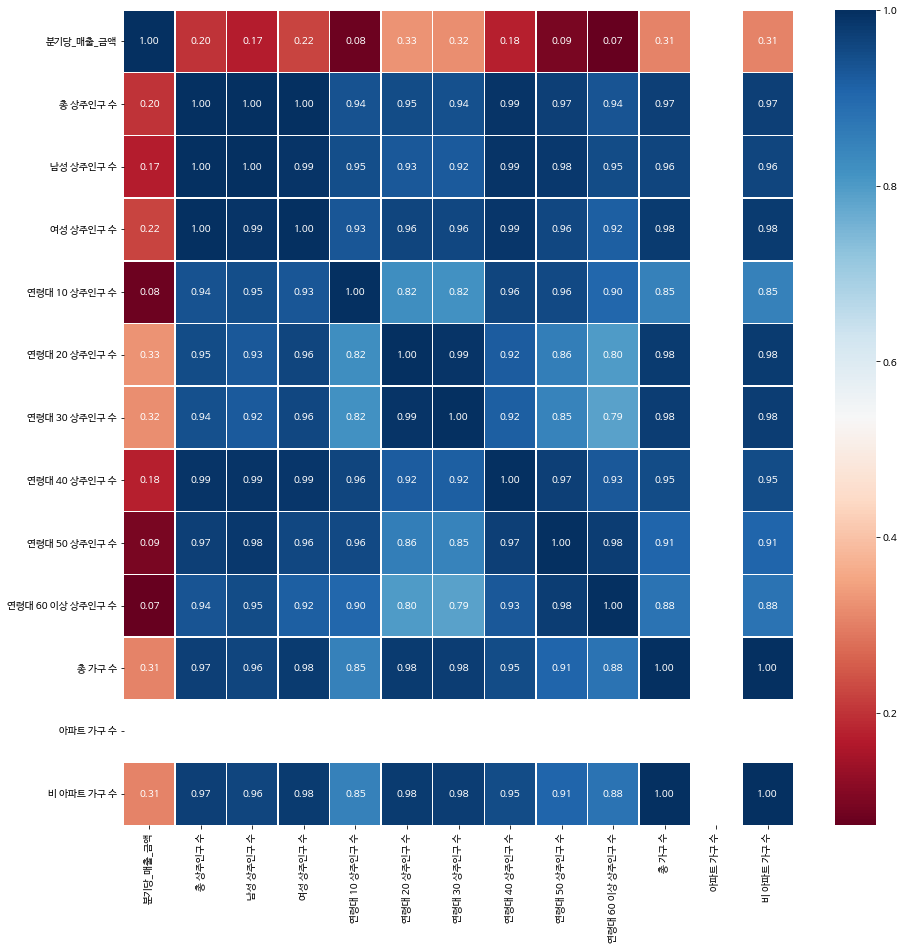

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data = csr_re.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='RdBu')

In [ ]:
csw = pd.merge(cs,work_df,how='left',on='상권_코드')
csw.columns

Index(['행정동_코드', '상권_코드', '분기당_매출_금액', '기준_년월_코드', '기준_분기_코드', '상권_구분_코드',
       '상권_구분_코드_명', '상권_코드_명', '총_직장_인구_수', '남성_직장_인구_수', '여성_직장_인구_수',
       '연령대_10_직장_인구_수', '연령대_20_직장_인구_수', '연령대_30_직장_인구_수', '연령대_40_직장_인구_수',
       '연령대_50_직장_인구_수', '연령대_60_이상_직장_인구_수', '남성연령대_10_직장_인구_수',
       '남성연령대_20_직장_인구_수', '남성연령대_30_직장_인구_수', '남성연령대_40_직장_인구_수',
       '남성연령대_50_직장_인구_수', '남성연령대_60_이상_직장_인구_수', '여성연령대_10_직장_인구_수',
       '여성연령대_20_직장_인구_수', '여성연령대_30_직장_인구_수', '여성연령대_40_직장_인구_수',
       '여성연령대_50_직장_인구_수', '여성연령대_60_이상_직장_인구_수'],
      dtype='object')

In [ ]:
csw_re = csw[['분기당_매출_금액','총_직장_인구_수', '남성_직장_인구_수', '여성_직장_인구_수',
       '연령대_10_직장_인구_수', '연령대_20_직장_인구_수', '연령대_30_직장_인구_수', '연령대_40_직장_인구_수',
       '연령대_50_직장_인구_수', '연령대_60_이상_직장_인구_수', '남성연령대_10_직장_인구_수',
       '남성연령대_20_직장_인구_수', '남성연령대_30_직장_인구_수', '남성연령대_40_직장_인구_수',
       '남성연령대_50_직장_인구_수', '남성연령대_60_이상_직장_인구_수', '여성연령대_10_직장_인구_수',
       '여성연령대_20_직장_인구_수', '여성연령대_30_직장_인구_수', '여성연령대_40_직장_인구_수',
       '여성연령대_50_직장_인구_수', '여성연령대_60_이상_직장_인구_수']]
csw_re.head()

,분기당_매출_금액,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,연령대_50_직장_인구_수,연령대_60_이상_직장_인구_수,...,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수
0,843250088,688,480,208,5,317,167,84,70,45,...,116,53,50,40,1,100,51,31,20,5
1,2852759376,665,419,246,1,57,107,147,217,136,...,68,94,128,101,1,29,39,53,89,35
2,12860403657,1428,975,453,3,162,289,351,325,298,...,176,244,224,242,2,74,113,107,101,56
3,15375125687,1991,1333,658,6,249,412,547,436,341,...,278,331,307,256,5,89,134,216,129,85
4,4126775558,939,576,363,2,133,202,263,204,135,...,139,184,100,67,2,47,63,79,104,68


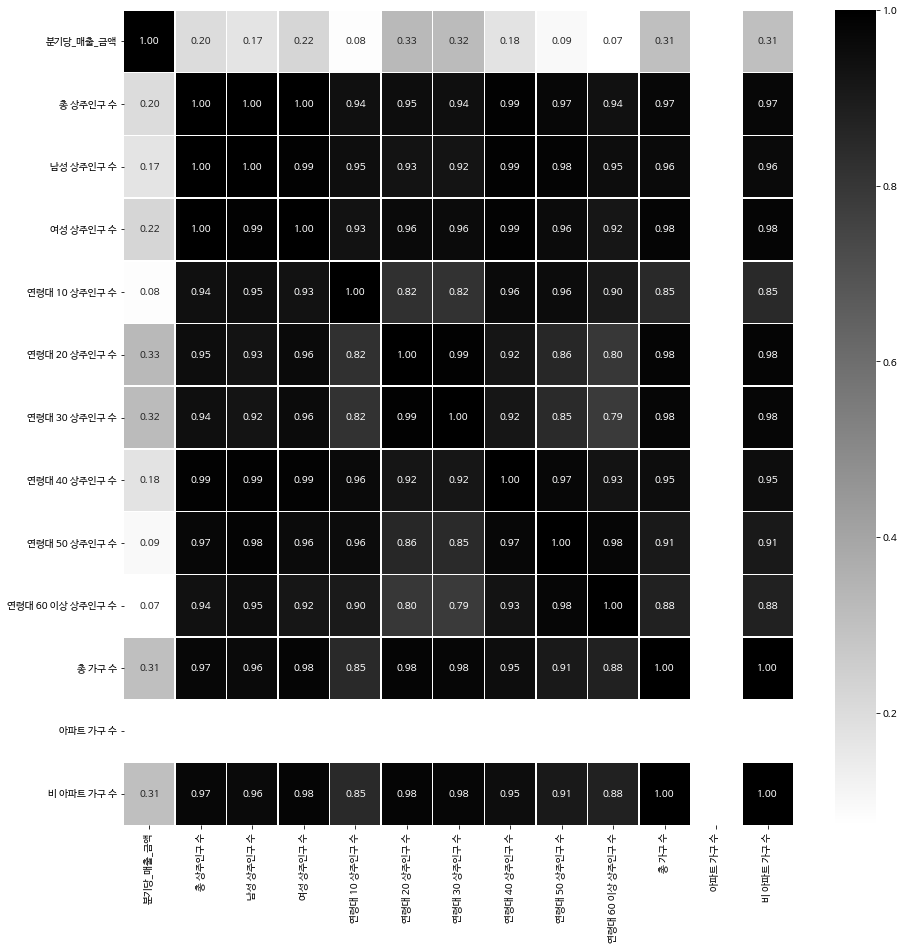

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data = csr_re.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='binary')

In [ ]:
csa = pd.merge(cs,apar_df,how='left',on='상권_코드')
csa.head()

,행정동_코드,상권_코드,분기당_매출_금액,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드_명,아파트_단지_수,아파트_면적_66_제곱미터_미만_세대_수,...,아파트_면적_165_제곱미터_세대_수,아파트_가격_1_억_미만_세대_수,아파트_가격_1_억_세대_수,아파트_가격_2_억_세대_수,아파트_가격_3_억_세대_수,아파트_가격_4_억_세대_수,아파트_가격_5_억_세대_수,아파트_가격_6_억_이상_세대_수,아파트_평균_면적,아파트_평균_시가
0,11710562,2111017,843250088,2022.0,3.0,A,골목상권,송파나루역 3번,52.0,390.0,...,NaN,17.0,154.0,184.0,100.0,4.0,1.0,NaN,50.0,230016503.0
1,11710570,2111030,2852759376,2022.0,3.0,A,골목상권,방이역 2번,53.0,388.0,...,2.0,13.0,195.0,190.0,104.0,4.0,2.0,NaN,54.0,220157559.0
2,11710600,2111010,12860403657,2022.0,3.0,A,골목상권,석촌역 7번,387.0,3055.0,...,4.0,183.0,1801.0,1061.0,433.0,105.0,21.0,9.0,47.0,217751210.0
3,11710650,2111003,15375125687,2022.0,3.0,A,골목상권,삼전역 4번,394.0,2925.0,...,NaN,162.0,1511.0,1268.0,425.0,82.0,16.0,422.0,48.0,226246486.0
4,11710641,2111023,4126775558,2022.0,3.0,A,골목상권,문정역 1번,73.0,605.0,...,NaN,61.0,344.0,207.0,47.0,9.0,3.0,NaN,44.0,205414808.0


In [ ]:
csa.fillna(0,inplace=True)
csa.head()

,행정동_코드,상권_코드,분기당_매출_금액,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드_명,아파트_단지_수,아파트_면적_66_제곱미터_미만_세대_수,...,아파트_면적_165_제곱미터_세대_수,아파트_가격_1_억_미만_세대_수,아파트_가격_1_억_세대_수,아파트_가격_2_억_세대_수,아파트_가격_3_억_세대_수,아파트_가격_4_억_세대_수,아파트_가격_5_억_세대_수,아파트_가격_6_억_이상_세대_수,아파트_평균_면적,아파트_평균_시가
0,11710562,2111017,843250088,2022.0,3.0,A,골목상권,송파나루역 3번,52.0,390.0,...,0.0,17.0,154.0,184.0,100.0,4.0,1.0,0.0,50.0,230016503.0
1,11710570,2111030,2852759376,2022.0,3.0,A,골목상권,방이역 2번,53.0,388.0,...,2.0,13.0,195.0,190.0,104.0,4.0,2.0,0.0,54.0,220157559.0
2,11710600,2111010,12860403657,2022.0,3.0,A,골목상권,석촌역 7번,387.0,3055.0,...,4.0,183.0,1801.0,1061.0,433.0,105.0,21.0,9.0,47.0,217751210.0
3,11710650,2111003,15375125687,2022.0,3.0,A,골목상권,삼전역 4번,394.0,2925.0,...,0.0,162.0,1511.0,1268.0,425.0,82.0,16.0,422.0,48.0,226246486.0
4,11710641,2111023,4126775558,2022.0,3.0,A,골목상권,문정역 1번,73.0,605.0,...,0.0,61.0,344.0,207.0,47.0,9.0,3.0,0.0,44.0,205414808.0


In [ ]:
csa.drop(['행정동_코드','상권_코드','기준_년_코드','기준_분기_코드',
          '상권_구분_코드','상권_구분_코드_명','상권_코드_명'],axis=1,inplace=True)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


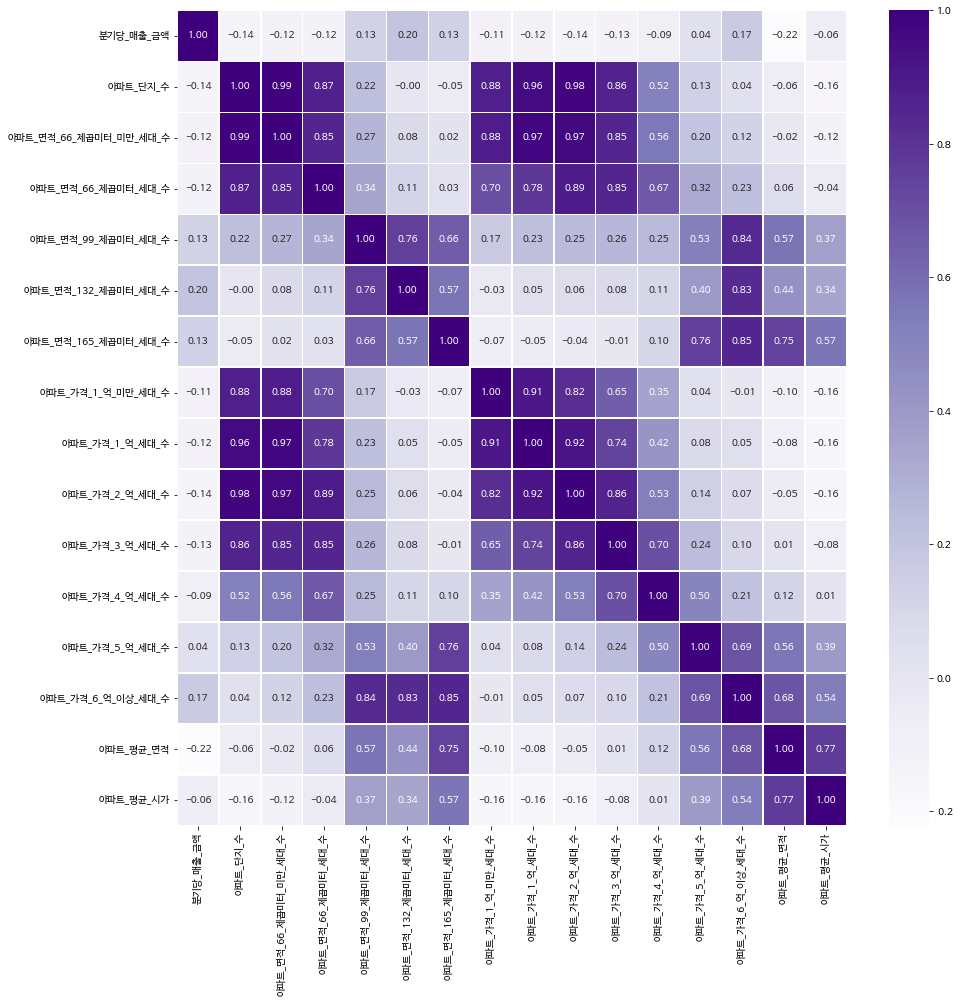

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data = csa.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Purples')

In [ ]:
csi = pd.merge(cs,inco_df,how='left',on='상권_코드')
csi.head()

,행정동_코드,상권_코드,분기당_매출_금액,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드_명,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,여가_지출_총금액,문화_지출_총금액,교육_지출_총금액,유흥_지출_총금액
0,11710562,2111017,843250088,2022.0,3.0,A,골목상권,송파나루역 3번,2637506.0,6.0,7.141369e+08,1.738444e+08,87973648.0,53343772.0,86910940.0,1.261575e+08,27193003.0,21181318.0,106418438.0,31113942.0
1,11710570,2111030,2852759376,2022.0,3.0,A,골목상권,방이역 2번,3000885.0,7.0,1.130415e+09,2.772508e+08,139074006.0,80883508.0,137730810.0,1.928212e+08,46245989.0,32272099.0,176652041.0,47484616.0
2,11710600,2111010,12860403657,2022.0,3.0,A,골목상권,석촌역 7번,2932038.0,6.0,5.660251e+09,1.381343e+09,690583481.0,422556101.0,668291286.0,9.991203e+08,206859120.0,172358730.0,873799491.0,245339929.0
3,11710650,2111003,15375125687,2022.0,3.0,A,골목상권,삼전역 4번,3009722.0,7.0,6.139321e+09,1.473332e+09,751380966.0,453239325.0,716494453.0,1.083525e+09,225023965.0,184244133.0,985379726.0,266701679.0
4,11710641,2111023,4126775558,2022.0,3.0,A,골목상권,문정역 1번,2812677.0,6.0,1.412671e+09,3.507635e+08,169194810.0,100210133.0,169788147.0,2.419628e+08,48868428.0,42196242.0,230117564.0,59569588.0


In [ ]:
csi.drop(['행정동_코드','상권_코드','기준_년_코드','기준_분기_코드',
          '상권_구분_코드','상권_구분_코드_명','상권_코드_명'],axis=1,inplace=True)

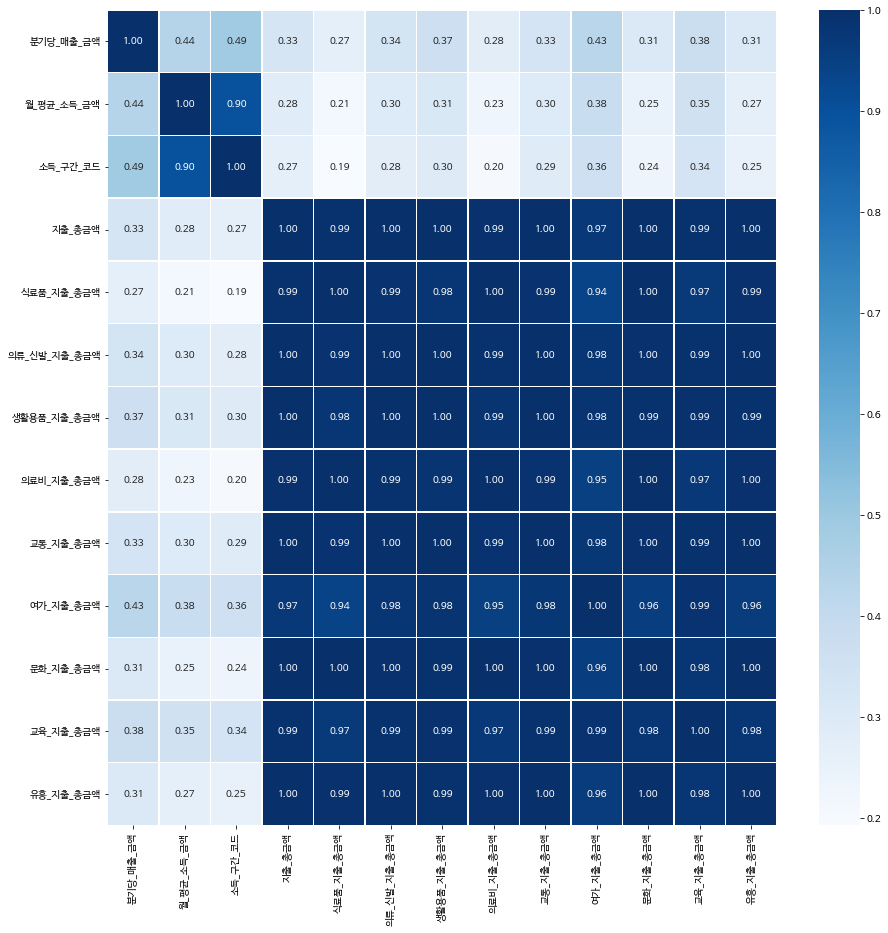

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data = csi.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [ ]:
save_raw = pd.read_excel("/gdrive/My Drive/권수연/송파-신생기업생존율.xlsx")

In [ ]:
save_raw.rename(columns = {'Unnamed: 0':'행정동'},inplace=True)

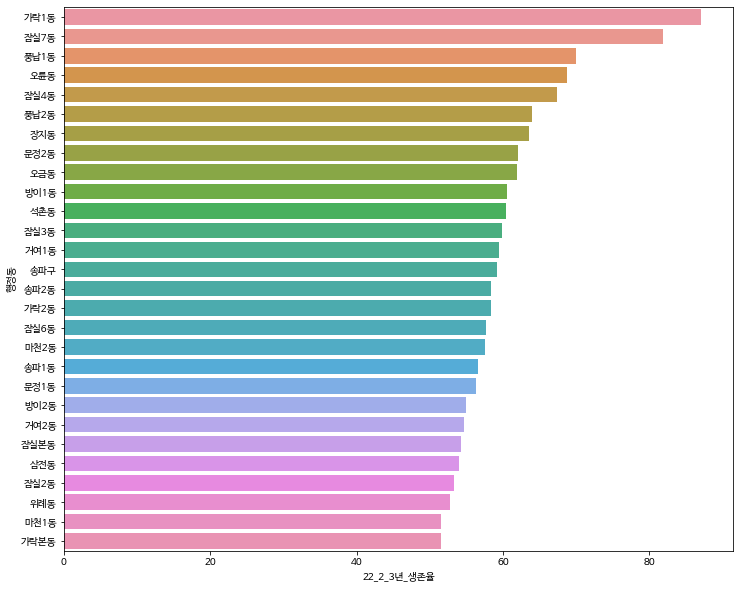

In [ ]:
plt.figure(figsize=(12, 10))

sns.barplot(data=save_raw.sort_values('22_2_3년_생존율',ascending=False),x='22_2_3년_생존율',y='행정동')

In [ ]:
save_df = save_raw.set_index('행정동')

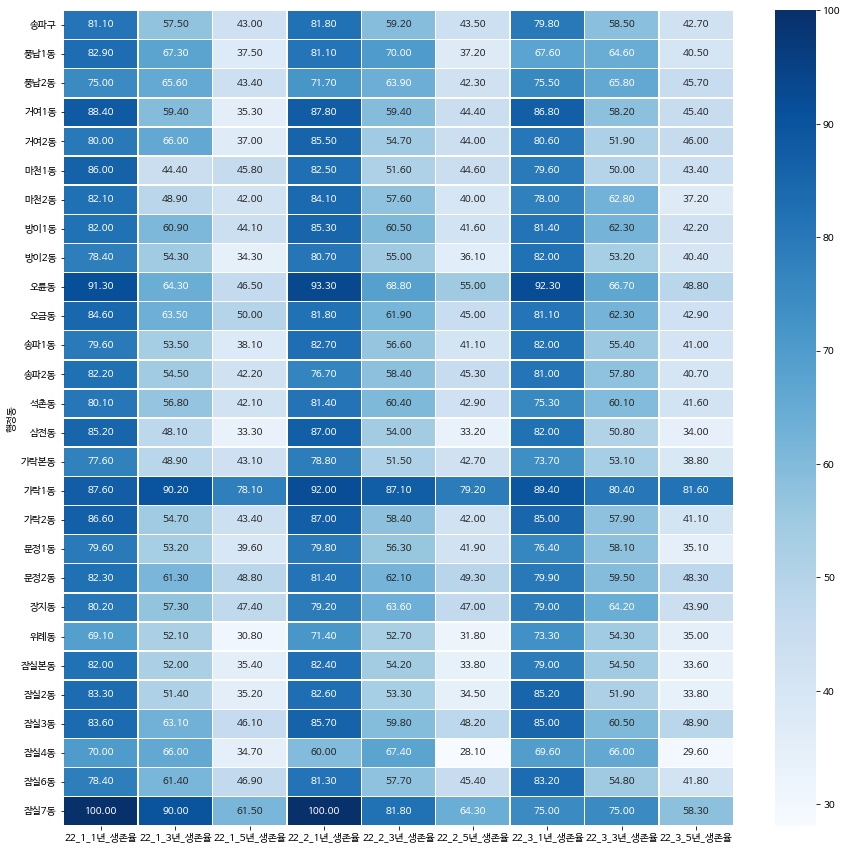

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data = save_df, annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [ ]:
save_df['평균_생존율'] = save_df.mean(axis=1)

In [ ]:
save_df.sort_values('평균_생존율',ascending=False)['평균_생존율']

행정동
가락1동    85.066667
잠실7동    78.433333
오륜동     69.666667
잠실3동    64.544444
오금동     63.677778
문정2동    63.655556
거여1동    62.788889
장지동     62.422222
방이1동    62.255556
가락2동    61.788889
잠실6동    61.211111
풍납2동    60.988889
풍납1동    60.966667
송파구     60.788889
거여2동    60.633333
석촌동     60.077778
송파2동    59.866667
마천2동    59.188889
송파1동    58.888889
마천1동    58.655556
문정1동    57.777778
방이2동    57.155556
잠실2동    56.800000
가락본동    56.466667
삼전동     56.400000
잠실본동    56.322222
잠실4동    54.600000
위례동     52.277778
Name: 평균_생존율, dtype: float64

In [ ]:
save_raw.sort_values('22_2_1년_생존율',ascending=False)['행정동']

27    잠실7동
9      오륜동
16    가락1동
3     거여1동
17    가락2동
14     삼전동
24    잠실3동
4     거여2동
7     방이1동
6     마천2동
11    송파1동
23    잠실2동
5     마천1동
22    잠실본동
0      송파구
10     오금동
13     석촌동
19    문정2동
26    잠실6동
1     풍납1동
8     방이2동
18    문정1동
20     장지동
15    가락본동
12    송파2동
2     풍납2동
21     위례동
25    잠실4동
Name: 행정동, dtype: object

In [ ]:
save_raw.sort_values('22_3_3년_생존율',ascending=False)['행정동']

16    가락1동
27    잠실7동
9      오륜동
25    잠실4동
2     풍납2동
1     풍납1동
20     장지동
6     마천2동
7     방이1동
10     오금동
24    잠실3동
13     석촌동
19    문정2동
0      송파구
3     거여1동
18    문정1동
17    가락2동
12    송파2동
11    송파1동
26    잠실6동
22    잠실본동
21     위례동
8     방이2동
15    가락본동
23    잠실2동
4     거여2동
14     삼전동
5     마천1동
Name: 행정동, dtype: object

In [ ]:
popu_raw = pd.read_excel("/gdrive/My Drive/권수연/송파-면적당인구.xlsx")

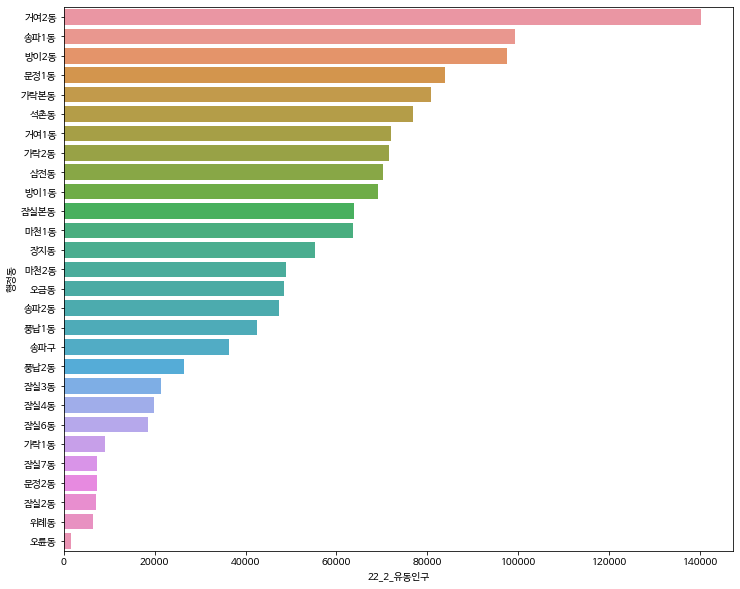

In [ ]:
plt.figure(figsize=(12, 10))

sns.barplot(data=popu_raw.sort_values('22_2_유동인구',ascending=False),x='22_2_유동인구',y='행정동')

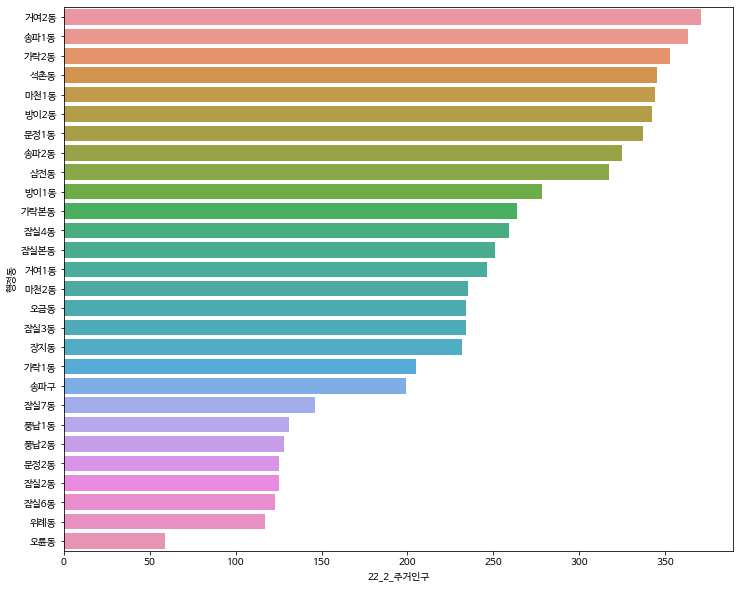

In [ ]:
plt.figure(figsize=(12, 10))

sns.barplot(data=popu_raw.sort_values('22_2_주거인구',ascending=False),x='22_2_주거인구',y='행정동')

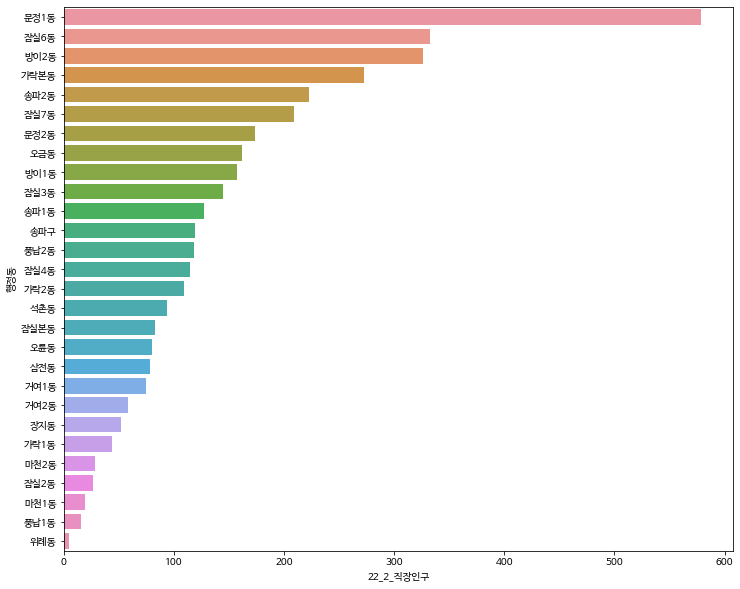

In [ ]:
plt.figure(figsize=(12, 10))

sns.barplot(data=popu_raw.sort_values('22_2_직장인구',ascending=False),x='22_2_직장인구',y='행정동')

In [ ]:
popu_df = popu_raw.set_index('행정동')

In [ ]:
save1 = save_df['22_2_1년_생존율']
popu1 = popu_df[['22_2_유동인구','22_2_주거인구','22_2_직장인구']]

In [ ]:
sp = pd.merge(save1,popu1,on='행정동',how='left')
sp

,22_2_1년_생존율,22_2_유동인구,22_2_주거인구,22_2_직장인구
행정동,,,,
송파구,81.8,36299,199,119
풍납1동,81.1,42628,131,16
풍납2동,71.7,26422,128,118
거여1동,87.8,71928,246,75
거여2동,85.5,140310,371,58
마천1동,82.5,63571,344,19
마천2동,84.1,48886,235,28
방이1동,85.3,69050,278,157
방이2동,80.7,97528,342,326


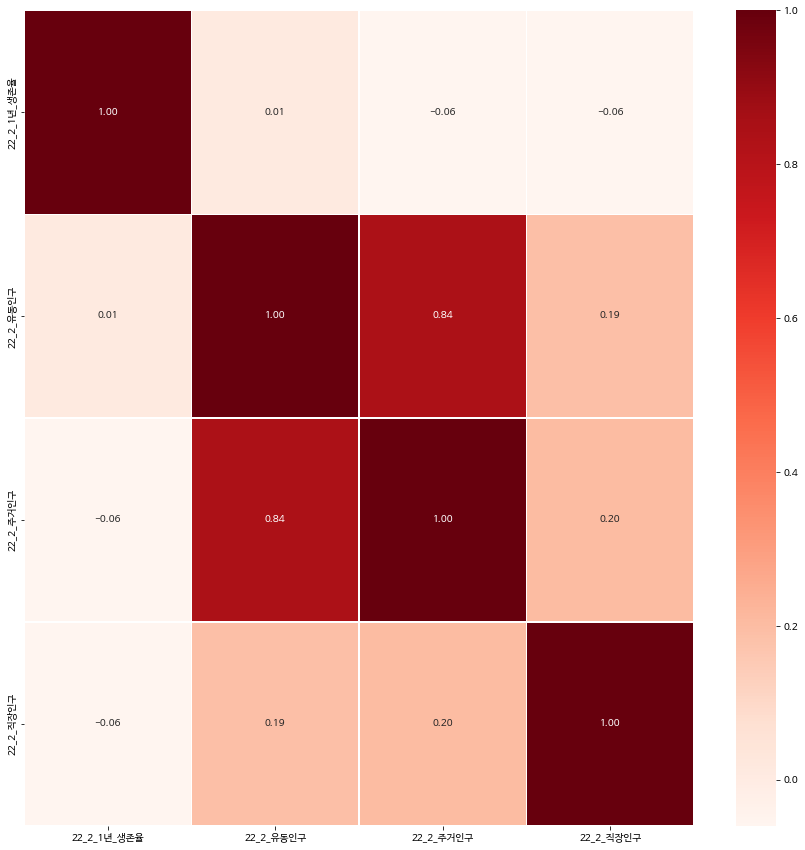

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data = sp.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Reds')

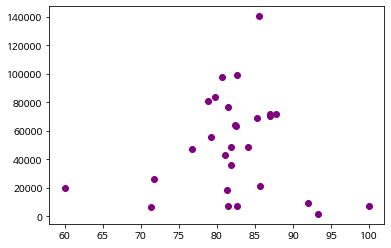

In [ ]:
plt.scatter(sp['22_2_1년_생존율'],sp['22_2_유동인구'],c='purple')

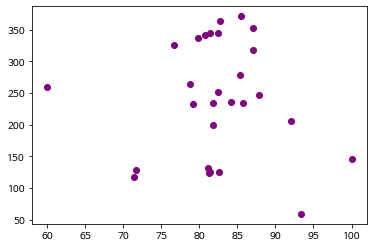

In [ ]:
plt.scatter(sp['22_2_1년_생존율'],sp['22_2_주거인구'],c='purple')

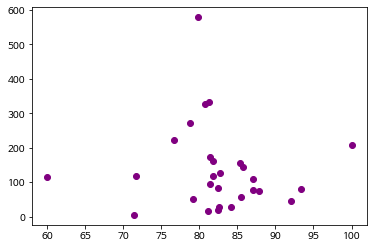

In [ ]:
plt.scatter(sp['22_2_1년_생존율'],sp['22_2_직장인구'],c='purple')

In [ ]:
lend_raw = pd.read_excel("/gdrive/My Drive/권수연/송파-임대료.xlsx")

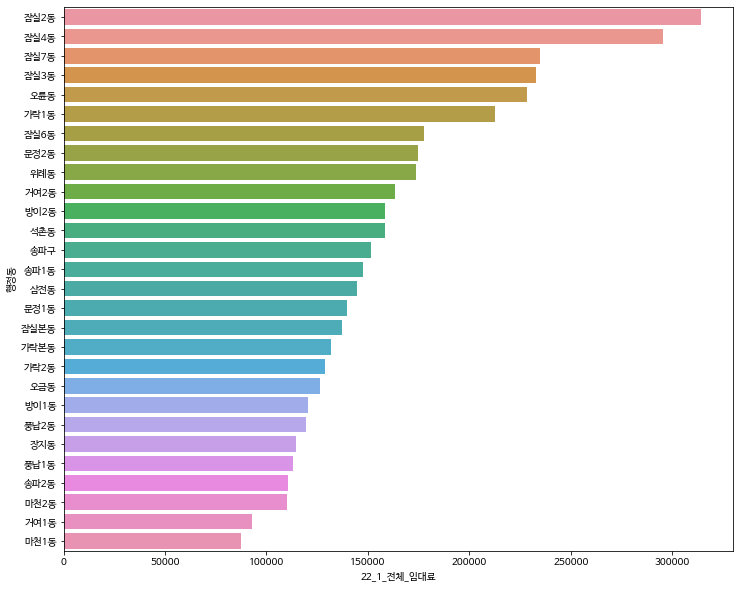

In [ ]:
plt.figure(figsize=(12, 10))

sns.barplot(data=lend_raw.sort_values('22_1_전체_임대료',ascending=False),x='22_1_전체_임대료',y='행정동')

In [ ]:
lend_df = lend_raw.set_index('행정동')

In [ ]:
save221 = save_df['22_1_1년_생존율']
lend221 = lend_df[['22_1_전체_임대료','22_1_1층_임대료']]

In [ ]:
sl = pd.merge(save221,lend221,on='행정동',how='left')
sl

,22_1_1년_생존율,22_1_전체_임대료,22_1_1층_임대료
행정동,,,
송파구,81.1,151705,180251
풍납1동,82.9,113131,127215
풍납2동,75.0,119451,133705
거여1동,88.4,92766,129785
거여2동,80.0,163458,202223
마천1동,86.0,87353,123452
마천2동,82.1,110089,146791
방이1동,82.0,120537,154731
방이2동,78.4,158535,203675


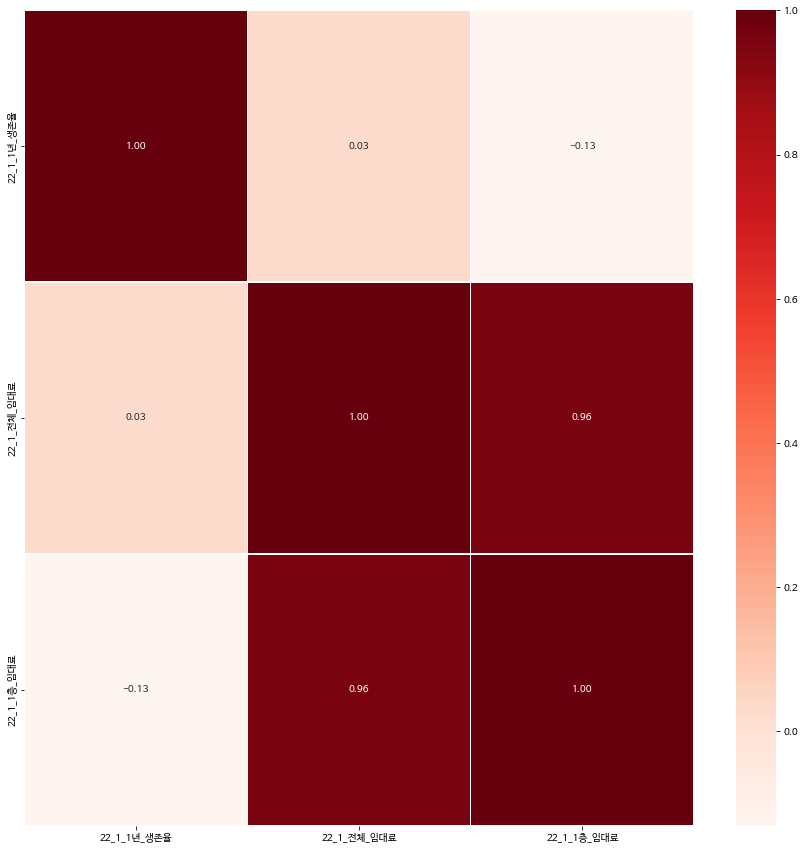

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data = sl.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Reds')

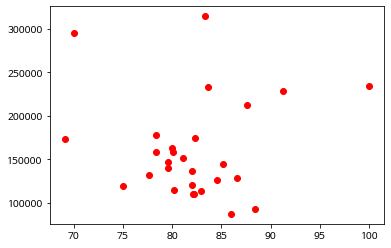

In [ ]:
plt.scatter(sl['22_1_1년_생존율'],sl['22_1_전체_임대료'],c='red')

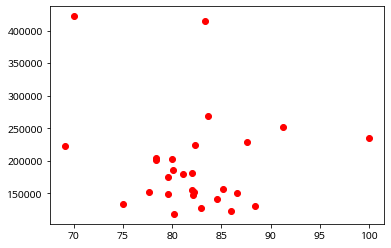

In [ ]:
plt.scatter(sl['22_1_1년_생존율'],sl['22_1_1층_임대료'],c='red')

In [ ]:
sdgg_raw = pd.read_excel("/gdrive/My Drive/권수연/송파-소득가구.xlsx")

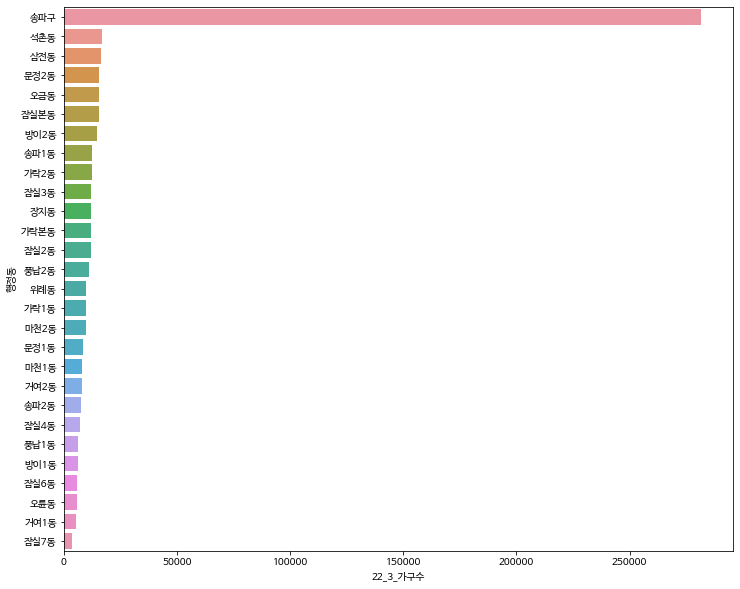

In [ ]:
plt.figure(figsize=(12, 10))

sns.barplot(data=sdgg_raw.sort_values('22_3_가구수',ascending=False),x='22_3_가구수',y='행정동')

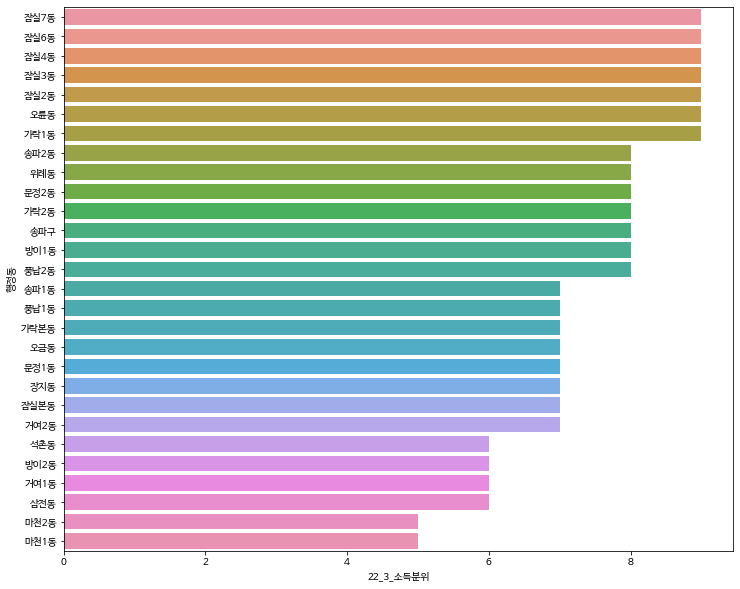

In [ ]:
plt.figure(figsize=(12, 10))

sns.barplot(data=sdgg_raw.sort_values('22_3_소득분위',ascending=False),x='22_3_소득분위',y='행정동')

In [ ]:
sdgg_df = sdgg_raw.set_index('행정동')

In [ ]:
save223 = save_df['22_3_1년_생존율']
sdgg223 = sdgg_df[['22_3_가구수','22_3_소득분위']]

In [ ]:
ss = pd.merge(save223,sdgg223,on='행정동',how='left')

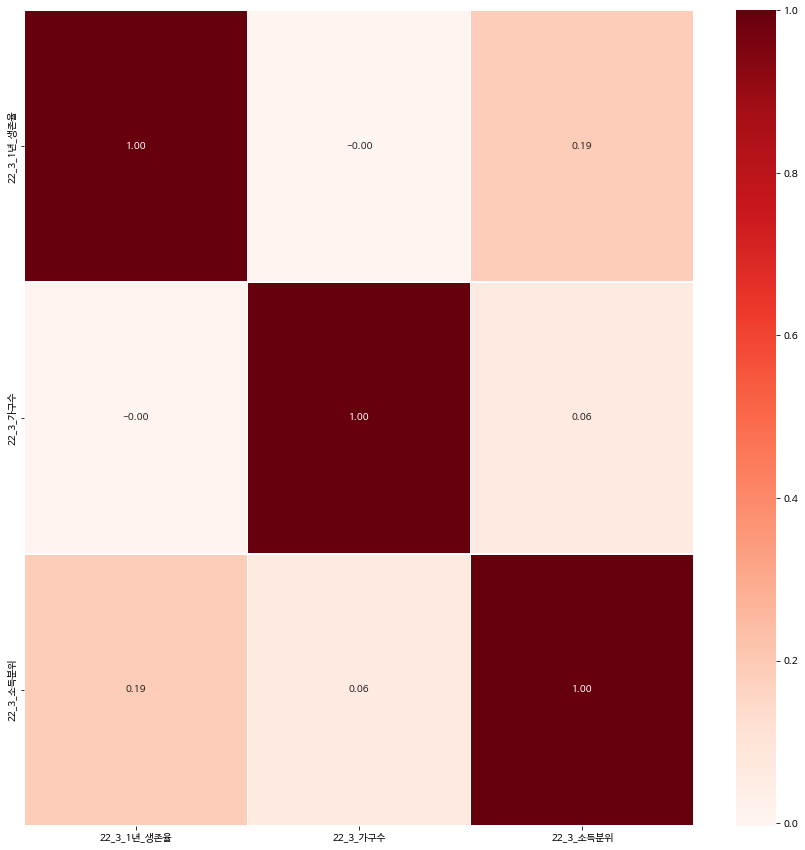

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data = ss.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Reds')

송파구 매출에 영향을 주는 것은 그나마 소득 분위인 것으로 보이지만 매출에 크게 영향을 준다고 보기는 어려울 것 같습니다.